In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import warnings 
warnings.filterwarnings("ignore")

In [6]:
data = yf.download("BTC-USD")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [7]:
data.shape

(2752, 1)

In [8]:
data.tail(5)

,Close
Date,
2022-03-26,44500.828125
2022-03-27,46820.492188
2022-03-28,47128.003906
2022-03-29,47465.730469
2022-03-30,47382.785156


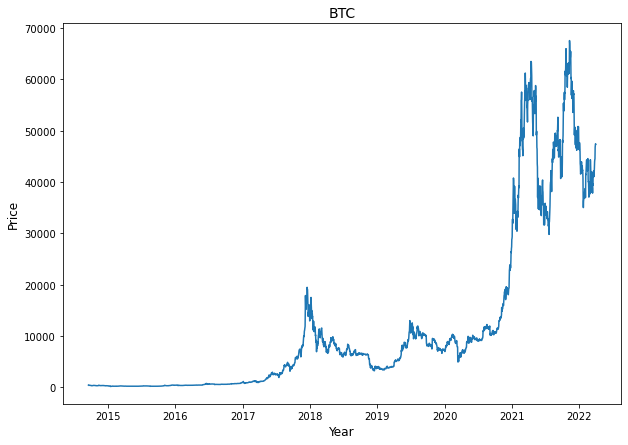

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('BTC', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [10]:
result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -0.80
5% Critical Value: -2.86
p-value: 0.82


In [ ]:
# Time series is not stationary as seen in the plot and with p>0.05 of ADF test.

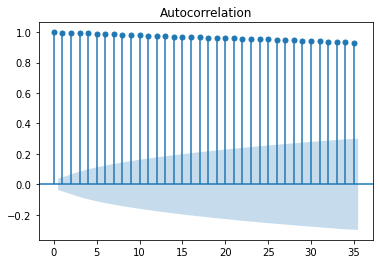

In [11]:
plot_acf(data.Close)
plt.show()

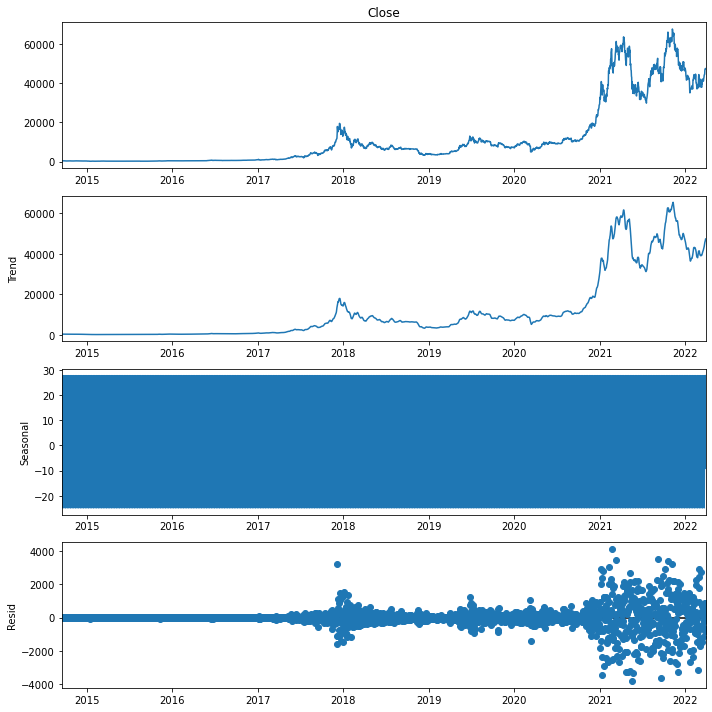

In [12]:
decompose = seasonal_decompose(data['Close'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
decompose.plot()
plt.show()

In [ ]:
# The time series show significant autocorrelation.

In [13]:
data_diff=pd.DataFrame((np.log(data.Close)).diff().dropna())

In [14]:
data_diff

,Close
Date,
2014-09-18,-0.074643
2014-09-19,-0.072402
2014-09-20,0.035111
2014-09-21,-0.024968
2014-09-22,0.008317
...,...
2022-03-26,0.003424
2022-03-27,0.050813
2022-03-28,0.006546


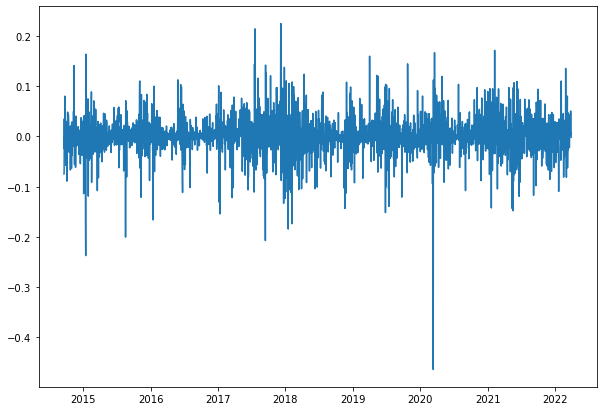

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(data_diff)
plt.show()

In [16]:
adfuller(data_diff, autolag='AIC')


(-15.801520432938503,
 1.0726484453702587e-28,
 9,
 2741,
 {'1%': -3.4327379732269048,
  '5%': -2.862595034666578,
  '10%': -2.567331628897652},
 -9917.181614974736)

In [ ]:
# After taking the log and differencing, now the p value is lower than 0.05, we reject the null 
# hypothesis so the time series is stationary.

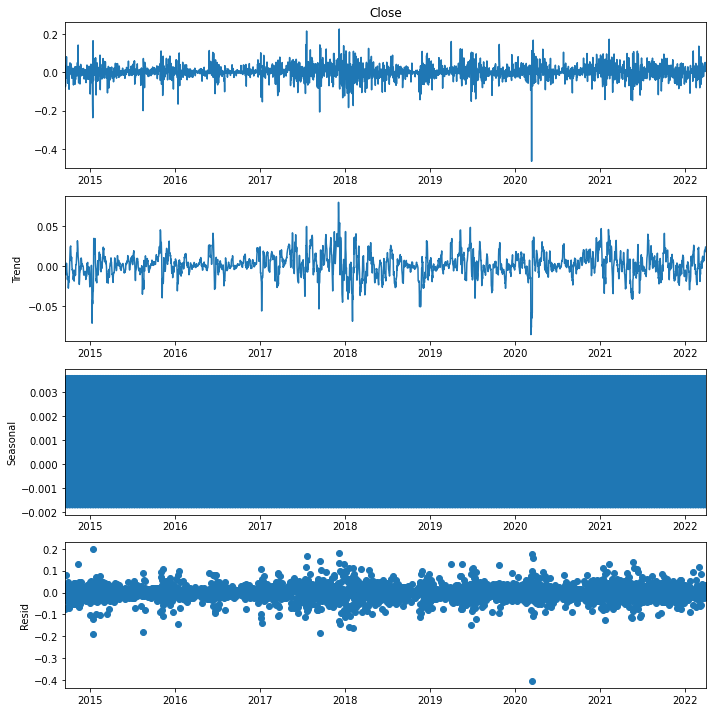

In [214]:
decompose_diff =seasonal_decompose(data_diff['Close'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
decompose_diff.plot()
plt.show()


In [17]:
from pmdarima import auto_arima
stepwise_model = auto_arima(data_diff, start_p=1, start_q=1,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, seasonal=False, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8056.742, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8885.740, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8058.741, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9231.450, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9416.626, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-9526.606, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-9642.038, Time=1.92 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-9900.707, Time=3.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-9948.375, Time=3.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9954.983, Time=2.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9987.349, Time=2.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   :

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# First to see if my forecast fits the test, I'm splitting the data to train and test and running the tests on these.

In [19]:
split = len(data_diff) - 10
train, test = data_diff[0:split], data_diff[split:]

In [20]:
model= ARIMA(train, order=(2, 1, 1)).fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81677D+00    |proj g|=  1.32805D+01

At iterate    5    f= -1.81682D+00    |proj g|=  1.54800D-01

At iterate   10    f= -1.81682D+00    |proj g|=  2.46175D+00

At iterate   15    f= -1.81695D+00    |proj g|=  1.71460D+01

At iterate   20    f= -1.81709D+00    |proj g|=  1.46987D-02

At iterate   25    f= -1.81709D+00    |proj g|=  2.99359D+00

At iterate   30    f= -1.81756D+00    |proj g|=  3.02234D+01

At iterate   35    f= -1.81839D+00    |proj g|=  2.03567D+00

At iterate   40    f= -1.81839D+00    |proj g|=  1.07956D+00

At iterate   45    f= -1.81841D+00    |proj g|=  1.61261D+01

At iterate   50    f= -1.81878D+00    |proj g|=  2.87167D+01

At iterate   55    f= -1.81888D+00    |proj g|=  1.08832D+01

At iterate   60    f= -1.81889D+00    |proj g|=  8.38362D-02

           * * *

Tit   = 

In [21]:
pred=model.predict(len(train), len(data_diff)-1)

In [22]:
pred

2022-03-21    2.412424e-02
2022-03-22   -5.011918e-04
2022-03-23   -5.860949e-06
2022-03-24    1.253764e-06
2022-03-25    7.389104e-07
2022-03-26    7.449467e-07
2022-03-27    7.451895e-07
2022-03-28    7.451798e-07
2022-03-29    7.451798e-07
2022-03-30    7.451798e-07
Freq: D, dtype: float64

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(pred, test)

array([0.01902365, 0.02151946, 0.02119196, 0.02118731, 0.02118764,
       0.02118764, 0.02118764, 0.02118764, 0.02118764, 0.02118764])

In [ ]:
# RMSE values are small so the model looks good. Now, let's model it on the entire dataset and predict for the next 
# 5 periods.

In [25]:
model= ARIMA(data_diff, order=(2, 1, 1)).fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81804D+00    |proj g|=  1.30439D+01

At iterate    5    f= -1.81808D+00    |proj g|=  1.35781D-01

At iterate   10    f= -1.81808D+00    |proj g|=  2.13955D+00

At iterate   15    f= -1.81819D+00    |proj g|=  1.64853D+01

At iterate   20    f= -1.81835D+00    |proj g|=  2.25738D-02

At iterate   25    f= -1.81835D+00    |proj g|=  3.93128D-02

At iterate   30    f= -1.81835D+00    |proj g|=  5.13048D-01

At iterate   35    f= -1.81837D+00    |proj g|=  5.73099D+00

At iterate   40    f= -1.81903D+00    |proj g|=  3.92525D+01

At iterate   45    f= -1.81968D+00    |proj g|=  1.01096D-01

At iterate   50    f= -1.81968D+00    |proj g|=  3.30685D-01

At iterate   55    f= -1.81968D+00    |proj g|=  4.51631D+00

At iterate   60    f= -1.81984D+00    |proj g|=  3.37915D+01

At iterate   65    f= -1.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     84    125      1     1     0   3.557D+00  -1.820D+00
  F =  -1.8203095182193263     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2750
Model:                 ARIMA(2, 1, 1)   Log Likelihood                5005.851
Method:                       css-mle   S.D. of innovations              0.039
Date:                Wed, 30 Mar 2022   AIC                         -10001.702
Time:                       

In [26]:
forecast=model.predict(len(data_diff), len(data_diff)+4)

In [27]:
rmse(data_diff, forecast)

array([0.039208  , 0.03917866, 0.03917434, 0.03917467, 0.03917466])

In [29]:
forecast=pd.DataFrame(forecast)

In [58]:
data_log=pd.DataFrame(np.log(data.Close))
data_log

,Close
Date,
2014-09-17,6.125414
2014-09-18,6.050771
2014-09-19,5.978369
2014-09-20,6.013480
2014-09-21,5.988513
...,...
2022-03-26,10.703263
2022-03-27,10.754076
2022-03-28,10.760623


In [32]:
forecast

,0
2022-03-31,4.022933e-03
2022-04-01,-9.007406e-05
2022-04-02,7.802914e-06
2022-04-03,9.355724e-08
2022-04-04,3.811697e-07


In [59]:
data_log.tail(1)

,Close
Date,
2022-03-30,10.766014


In [53]:
add=np.array(forecast[0])
add

array([ 4.02293275e-03, -9.00740595e-05,  7.80291402e-06,  9.35572382e-08,
        3.81169658e-07])

In [60]:
for i in add:
    new_data=data_log.tail(1)+i
    data_log=data_log.append(new_data)
print(data_log.tail(5))

                Close
Date                 
2022-03-30  10.770037
2022-03-30  10.769947
2022-03-30  10.769955
2022-03-30  10.769955
2022-03-30  10.769955


In [81]:
dates= pd.date_range('2014-09-17', '2022-04-04', freq='d')

In [82]:
data_log['Date']=dates

In [83]:
data_log.reset_index(drop=True, inplace=True)

In [84]:
data_log.set_index('Date', inplace=True)

In [86]:
data_log.tail(5)

,Close
Date,
2022-03-31,10.770037
2022-04-01,10.769947
2022-04-02,10.769955
2022-04-03,10.769955
2022-04-04,10.769955


In [87]:
data_prediction=np.exp(data_log)


In [88]:
data_prediction.tail(10)

,Close
Date,
2022-03-26,44500.828125
2022-03-27,46820.492188
2022-03-28,47128.003906
2022-03-29,47465.730469
2022-03-30,47382.785156
2022-03-31,47573.786850
2022-04-01,47569.501879
2022-04-02,47569.873061
2022-04-03,47569.877512


In [ ]:
# I recommend to buy BTC because the forecast for the next 5 days looks like it is increasing.